# ATMOS 2022 - Corine Analysis

-----------

## 0. Import Libraries

In [1]:
import matplotlib.pyplot as plt
import proplot

from utils.data import *
from utils.utils import *
from utils.visualization_codes import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

## 1. Calculate Urban Fraction

In [2]:
# province names
provinces = ['istanbul', 'ankara']

# define land-use index correspondence of name
indexes = define_index_correspondence()
    
# years in data
years = [1990, 2000, 2012, 2018]

# define which land cover is used for the calculation
total_land_use = 'all'
land_use = 'urban'

In [3]:
# calculation of urban fraction
province_urban_percent = {}
for province in provinces:
    
    # open specific province corine data
    dt = retrieve_corine(province)

    # find urban percentages relative to total grid
    urban_percent = {}
    for year in years:

        # find total grid amount in single year data
        total_grid_amount = find_grid_amount(dt,
                                             indexes[total_land_use],
                                             year)

        # find urban grid amount in single year data
        urban_grid_amount = find_grid_amount(dt,
                                             indexes[land_use],
                                             year)

        # calculate percent representation of urban LU relative to whole LU
        urban_percent[year] = (urban_grid_amount / total_grid_amount) * 100 
    
    province_urban_percent[province] = urban_percent

In [4]:
province_urban_percent_df = pd.DataFrame(province_urban_percent)

In [5]:
province_urban_percent_df

,istanbul,ankara
1990,13.179435,2.146154
2000,18.622735,2.893208
2012,20.536583,3.458225
2018,22.657564,3.922750


### 1.1 Check Urban Fraction Visually

#### 1.1.1 İstanbul

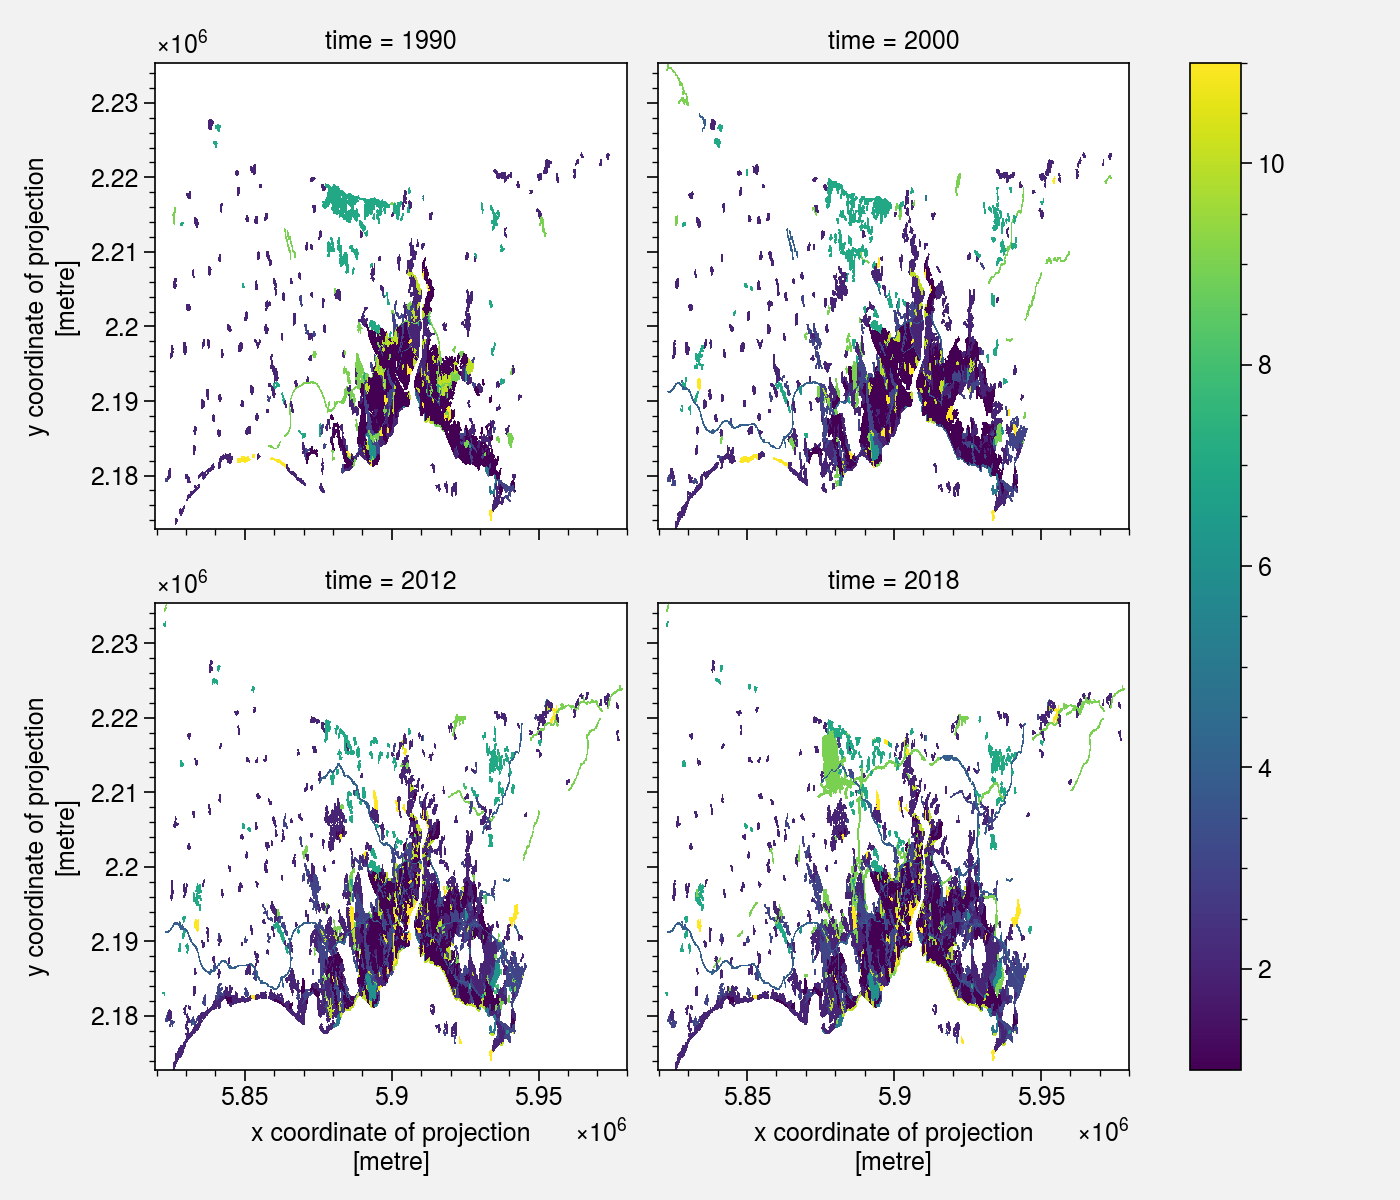

In [6]:
index = 'urban'
province = 'istanbul'
dt = retrieve_corine(province)

dt.where(dt.isin(indexes[index])).plot(col='time',
                                       col_wrap=2)

#### 1.1.2 Ankara

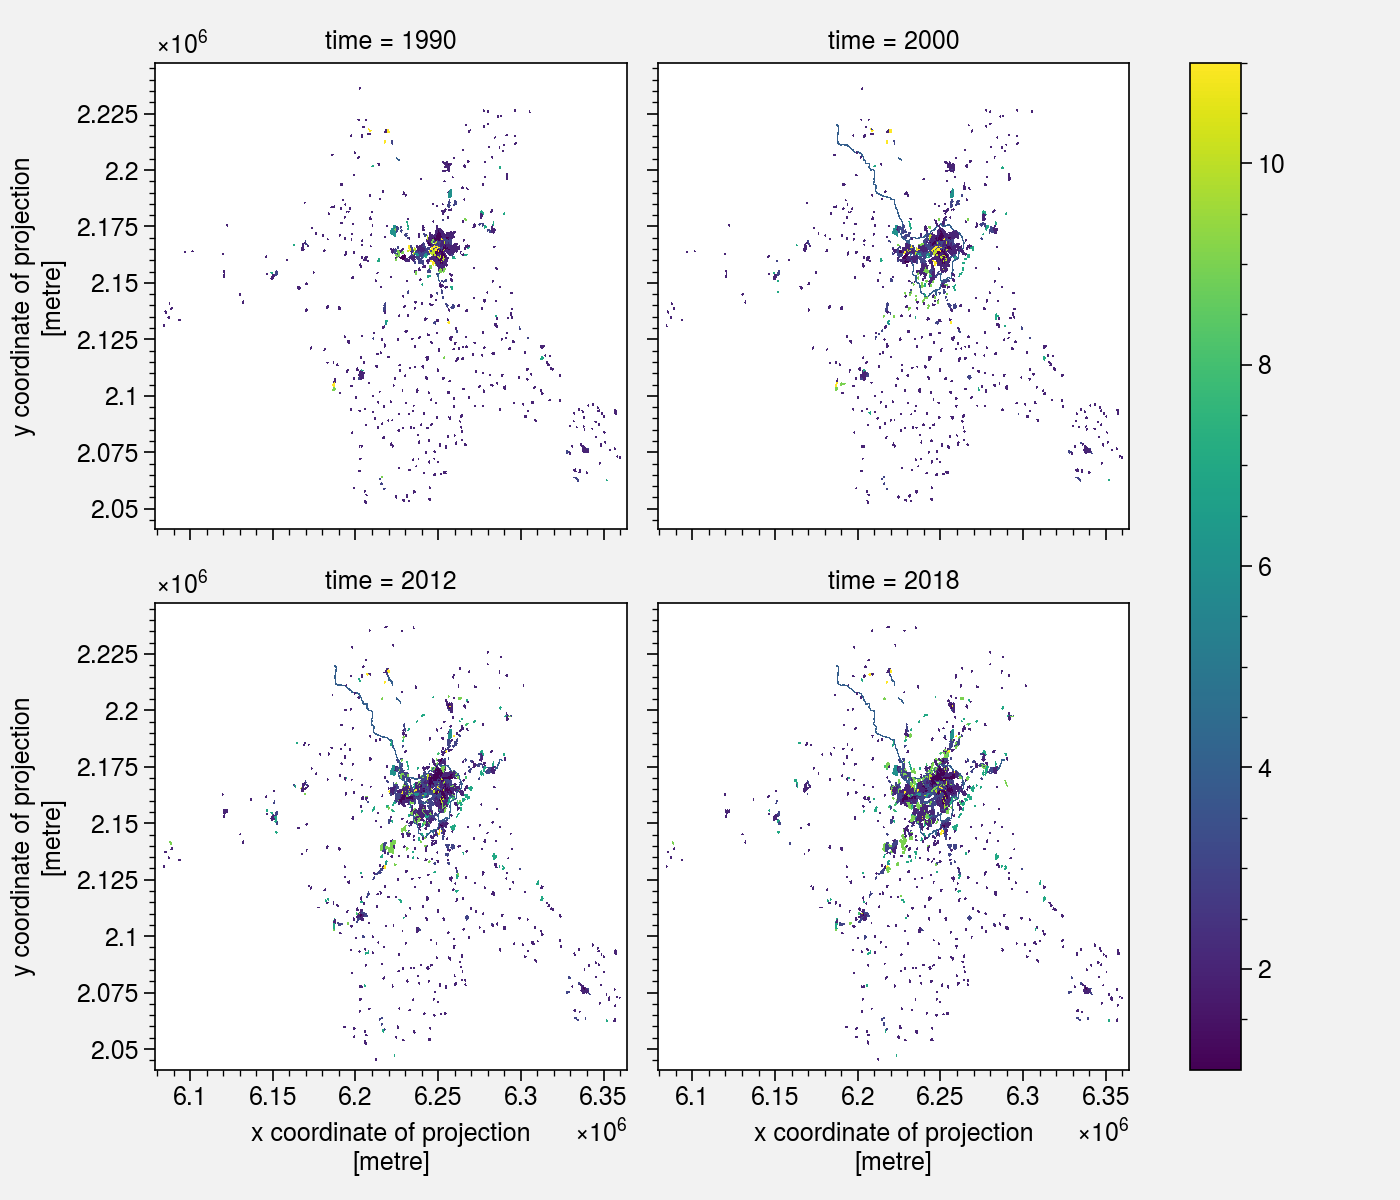

In [7]:
index = 'urban'
province = 'ankara'
dt = retrieve_corine(province)

dt.where(dt.isin(indexes[index])).plot(col='time',
                                       col_wrap=2)

-------------

## 2. Yearly Change of Land-Use 

In [6]:
print(provinces)
print(list(indexes.keys())[:5])
print(years)

['istanbul', 'ankara']
['urban', 'agriculture', 'forest', 'wetlands', 'water']
[1990, 2000, 2012, 2018]


### 2.1 Calculate Grid Amounts

In [7]:
# array to gather data
grid_data = np.empty((len(provinces), 5, 4)) # 2or3 province 5 landuse 4 years

# loop over provinces
for i, province in enumerate(provinces):
    
    # open data for province
    dt = retrieve_corine(province)
    
    # loop over land uses
    for j, luse in enumerate(list(indexes.keys())[:5]):
            
        # loop over years
        for k, year in enumerate(years):
            
            # find and store grid amount
            grid_data[i, j, k] = int(find_grid_amount(dt,
                                                 indexes[luse],
                                                 year)
                                    )

In [8]:
# check istanbul's grid amounts for each land use
grid_data[0]

array([[ 72472., 102404., 112928., 124591.],
       [176885., 157920., 162773., 159306.],
       [286025., 273915., 257798., 250118.],
       [   342.,    397.,    750.,    750.],
       [ 14163.,  15251.,  15638.,  15122.]])

/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/ui.py:406: ProPlotWarning: You specified both figsize=(6, 4) and axwidth=1.5. Ignoring 'axwidth'.
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/axes/plot.py:507: MatplotlibDeprecationWarning: 
The IndexFormatter class was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  kw[xname + 'formatter'] = mticker.IndexFormatter(x)
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:94: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases lat

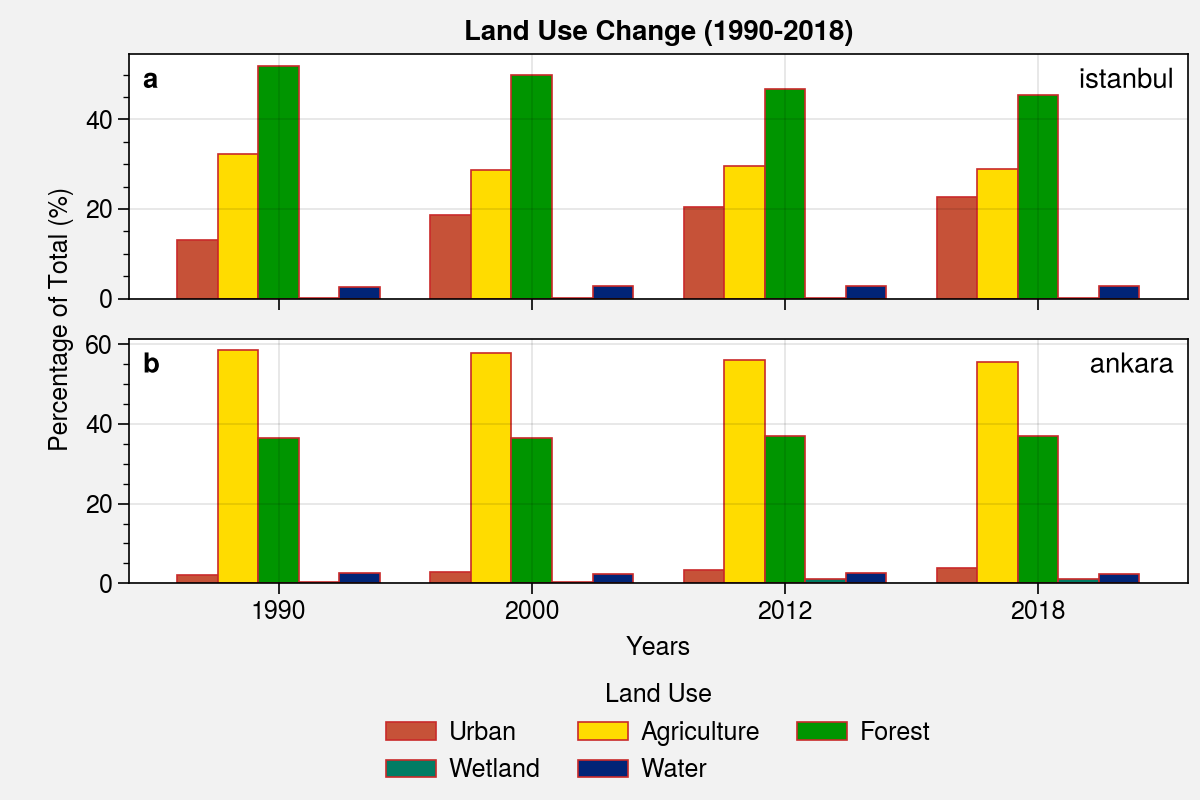

In [17]:
method = 'yearly_pdf_change'
fig_array = [[1, 1],
             [2, 2],
             ]
corine_yearly_pdf_change_plot(grid_data, method, fig_array, indexes, years, provinces)